In [355]:
import pandas as pd
import numpy as np 

In [356]:
athelete = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

In [357]:
df =athelete[athelete['Season'] == 'Summer']

In [358]:
df = df.merge(noc,on = 'NOC',how='inner')
df = df.drop(columns= 'notes')

In [359]:
df.drop_duplicates(inplace=True)

In [390]:
df = pd.concat([df,pd.get_dummies(df['Medal'],dtype= int)],axis=1)


`here data is based on athelethes so medal won by the team is count for every athletes'

In [361]:
medal_tally = df.drop_duplicates(subset = ['Team', 'NOC', 'Games','Year', 'Season', 'City','Sport', 'Event', 'Medal'])

In [362]:
medal_tally = medal_tally.groupby('region')[['Gold','Silver','Bronze']].sum().sort_values('Gold',ascending= False).reset_index()

In [363]:
medal_tally['total_medal'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [364]:
def medal():
    medal_tally = df.drop_duplicates(subset = ['Team', 'NOC', 'Games','Year', 'Season', 'City','Sport', 'Event', 'Medal'])
    medal_tally = medal_tally.groupby('region')[['Gold','Silver','Bronze']].sum().sort_values('Gold',ascending= False).reset_index()
    return medal_tally
    

In [365]:
year = df['Year'].unique().tolist()
year.sort()
year.insert(0 ,'overall')

In [366]:
country =  df['region'].dropna().unique().tolist()
country.sort()
country.insert(0 ,'overall')

In [367]:
medal_tally = df.drop_duplicates(subset = ['Team', 'NOC', 'Games','Year', 'Season', 'City','Sport', 'Event', 'Medal'])

In [368]:
def fetch_medal_tally(selected_year,selected_country):
    
    medal_tally = df.drop_duplicates(subset = ['Team', 'NOC', 'Games','Year', 'Season', 'City','Sport', 'Event', 'Medal'])
    flag = 0
    if selected_year == 'overall' and selected_country == 'overall':
        x = medal_tally
        
    if selected_year == 'overall' and selected_country != 'overall':
        x = medal_tally[medal_tally['region'] == selected_country]
        
    if selected_year != 'overall' and selected_country == 'overall':
        flag = 1
        x = medal_tally[medal_tally['Year'] == selected_year]
        
    if selected_year != 'overall' and selected_country != 'overall':
        x = medal_tally[(medal_tally['region'] == selected_country) & (medal_tally['Year'] == selected_year)]
    
    if flag == 1 :
        x = x.groupby('Year')[['Gold','Silver','Bronze']].sum().sort_values('Year').reset_index()
        
    else :
        x = x.groupby('region')[['Gold','Silver','Bronze']].sum().sort_values('Gold',ascending= False).reset_index()
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    
    print(x)      

In [369]:
fetch_medal_tally('overall','India')

  region  Gold  Silver  Bronze  Total
0  India     9       7      12     28


`overall Analysis`

In [370]:
df['Year'].nunique()
df['Event'].nunique()
df['Sport'].nunique()
df['region'].nunique()
df['Name'].nunique()
df['City'].nunique()


23

In [371]:
import matplotlib.pyplot as plt
import seaborn as sns

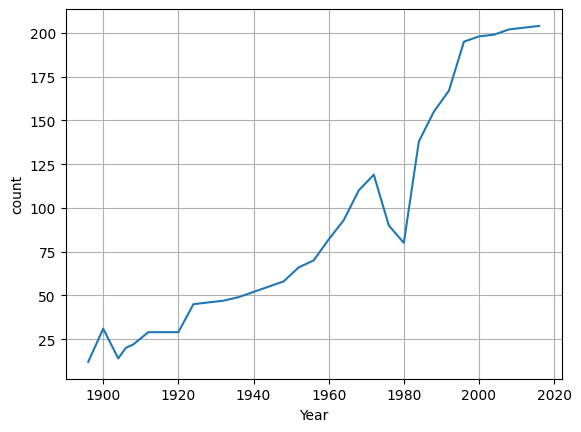

In [372]:
nation_over_year = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')
sns.lineplot(nation_over_year,x='Year',y='count')
plt.grid()
plt.show()


In [373]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'Bronze',
       'Gold', 'Silver'],
      dtype='object')

In [374]:
def data_over_time(col):
    data_over_year = df.drop_duplicates(['Year',col])['Year'].value_counts().reset_index().sort_values('Year')
    sns.lineplot(data_over_year,x='Year',y='count')
    plt.grid()
    plt.show()

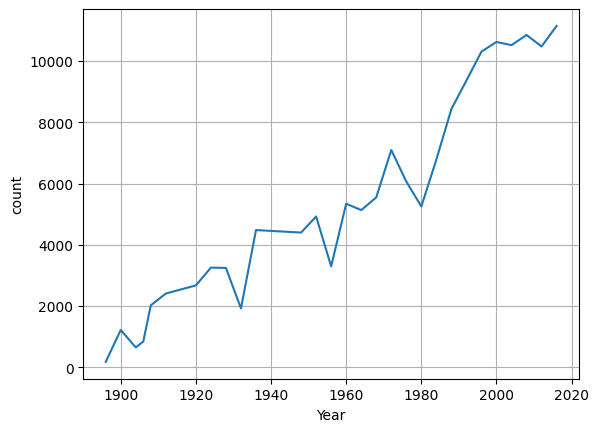

In [375]:
data_over_time('Name')

<Axes: xlabel='Year', ylabel='Sport'>

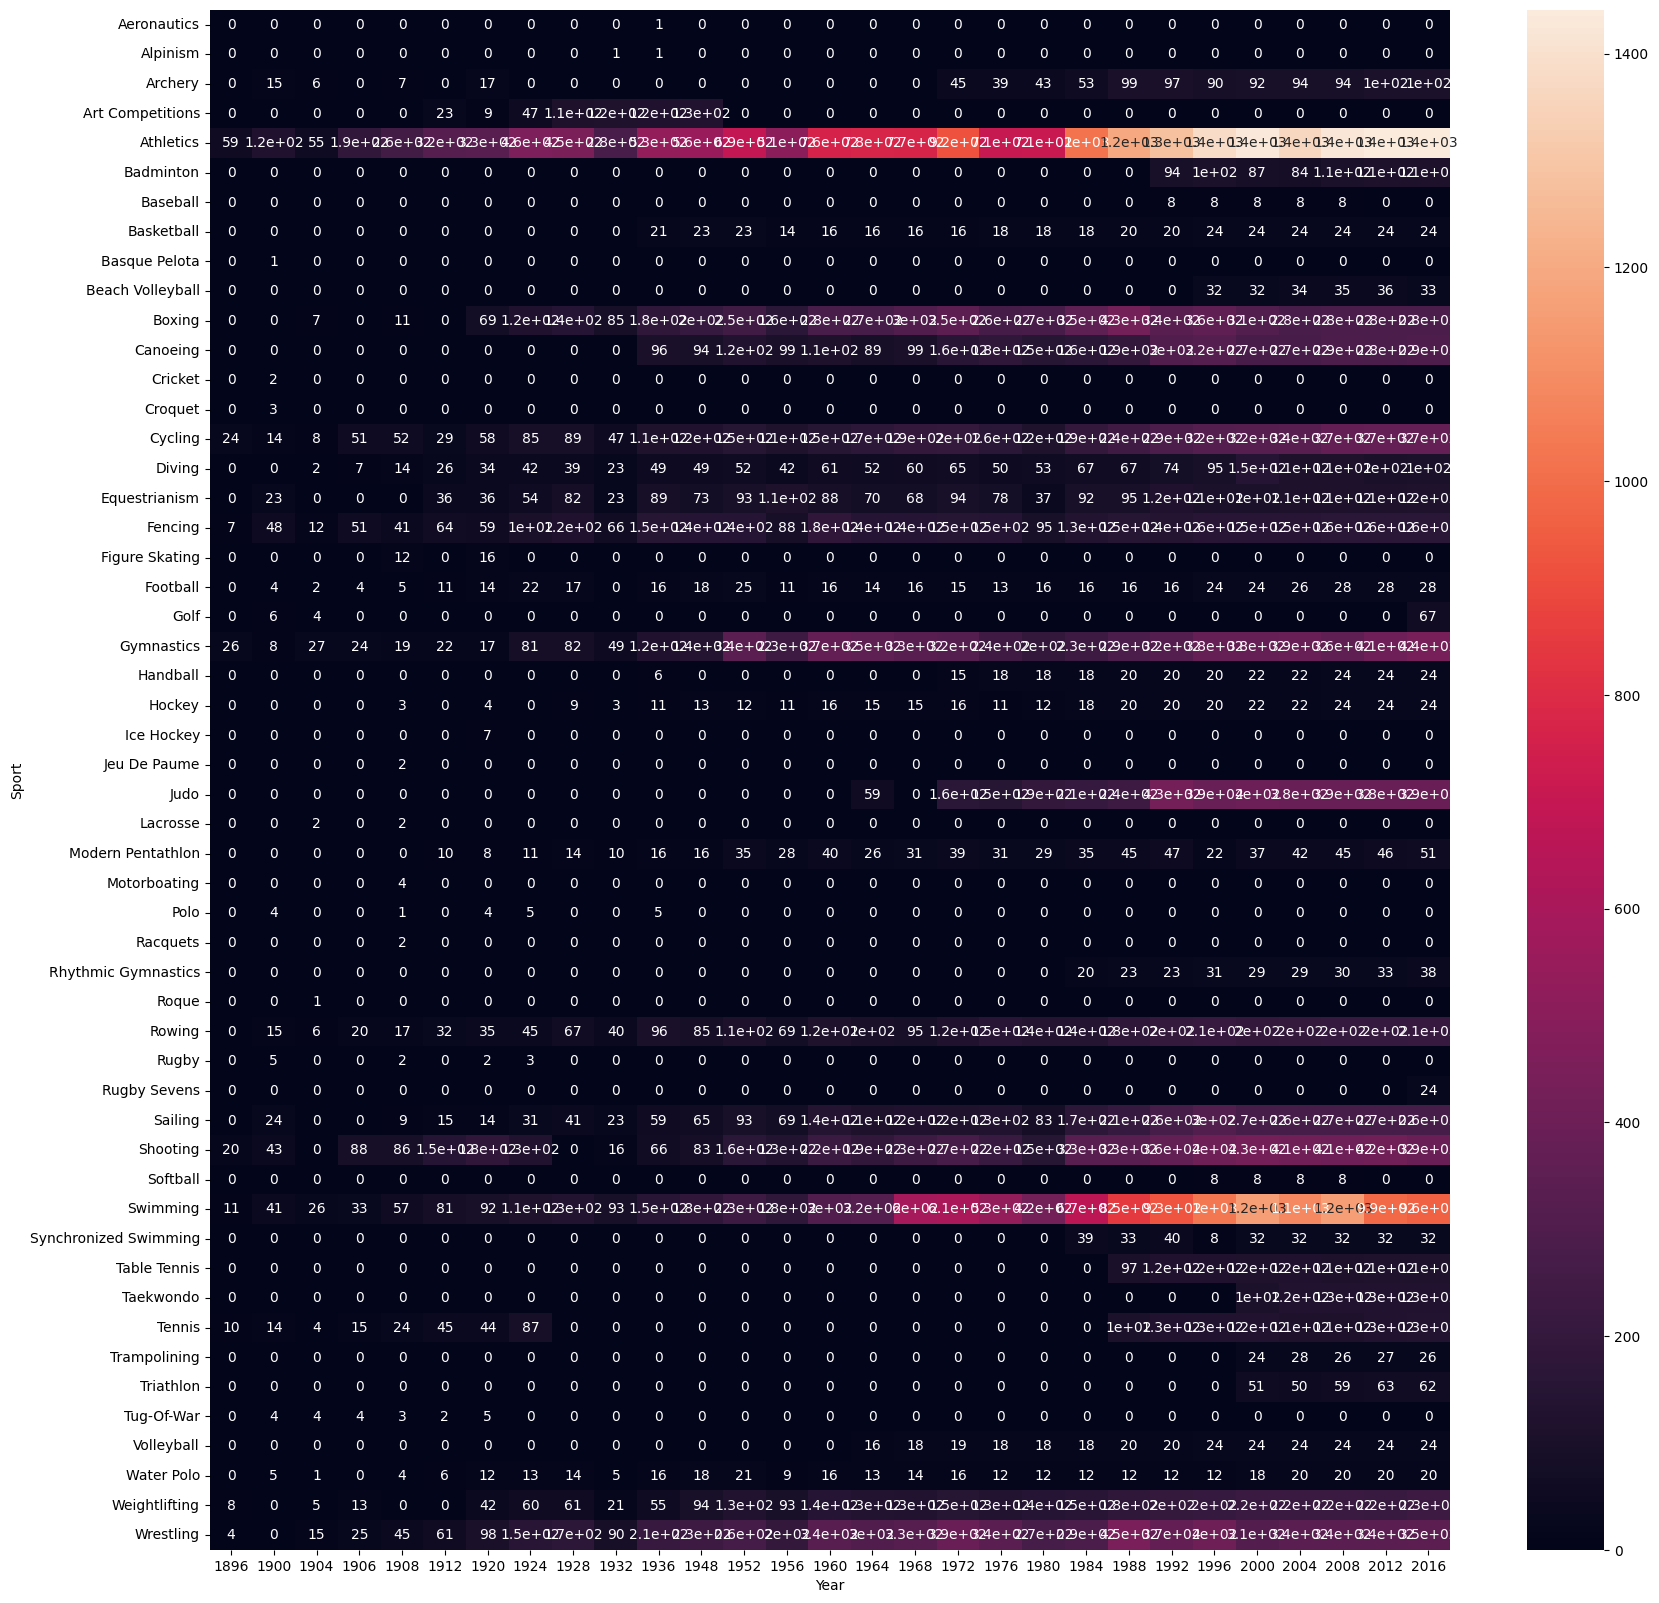

In [376]:
x = df.drop_duplicates(['Year','region','Event'])
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0),annot = True)

In [377]:
def most_successful(sport):

    x = df[(df['Gold'] !=0) | (df['Silver'] !=0) | (df['Bronze'] !=0)]
    if sport != 'overall':
        x = x[x['Sport'] == sport] 
    x =x['Name'].value_counts().reset_index().head(15).merge(df,how='left',left_on='Name',right_on='Name')[['Name','Sport','region','count']].drop_duplicates()
    return x
    

In [378]:
most_successful('Basketball')

,Name,Sport,region,count
0,Teresa Edwards,Basketball,USA,5
5,Diana Lurena Taurasi,Basketball,USA,4
9,Sergey Aleksandrovich Belov,Basketball,Russia,4
13,"Suzanne Brigit ""Sue"" Bird",Basketball,USA,4
17,Lauren Elizabeth Jackson,Basketball,Australia,4
21,Lisa Deshawn Leslie (-Lockwood),Basketball,USA,4
25,Kristi Lee Harrower,Basketball,Australia,4
29,Tamika Devonne Catchings,Basketball,USA,4
33,Gennady Georgiyevich Volnov,Basketball,Russia,4
37,Carmelo Kyan Anthony,Basketball,USA,4


In [379]:
x = df[(df['Gold'] !=0) | (df['Silver'] !=0) | (df['Bronze'] !=0)]
sport = x['Sport'].unique().tolist()
sport.sort()
sport.insert(0,'overall')
sport

['overall',
 'Aeronautics',
 'Alpinism',
 'Archery',
 'Art Competitions',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Basque Pelota',
 'Beach Volleyball',
 'Boxing',
 'Canoeing',
 'Cricket',
 'Croquet',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Figure Skating',
 'Football',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Jeu De Paume',
 'Judo',
 'Lacrosse',
 'Modern Pentathlon',
 'Motorboating',
 'Polo',
 'Racquets',
 'Rhythmic Gymnastics',
 'Roque',
 'Rowing',
 'Rugby',
 'Rugby Sevens',
 'Sailing',
 'Shooting',
 'Softball',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampolining',
 'Triathlon',
 'Tug-Of-War',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling']

In [380]:
def country_wise_medal(country):
    
    medal_tally = df.drop_duplicates(subset = ['Team', 'NOC', 'Games','Year', 'Season', 'City','Sport', 'Event', 'Medal'])
    medal_tally = medal_tally.dropna(subset='Medal')
    x = medal_tally[medal_tally['region'] == 'USA'].groupby('Year')['Medal'].count().reset_index()
    return x

In [381]:
country_wise_medal('USA')

,Year,Medal
0,1896,19
1,1900,54
2,1904,231
3,1906,23
4,1908,46
5,1912,63
6,1920,95
7,1924,99
8,1928,56
9,1932,110


In [382]:
def best_sport(country):
    medal_tally = df.drop_duplicates(subset = ['Team', 'NOC', 'Games','Year', 'Season', 'City','Sport', 'Event', 'Medal'])
    medal_tally = medal_tally.dropna(subset='Medal')
    medal_tally[medal_tally['region'] == country]
    sns.heatmap(medal_tally.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc= 'count').fillna(0).astype(int),annot= True)
    plt.show()

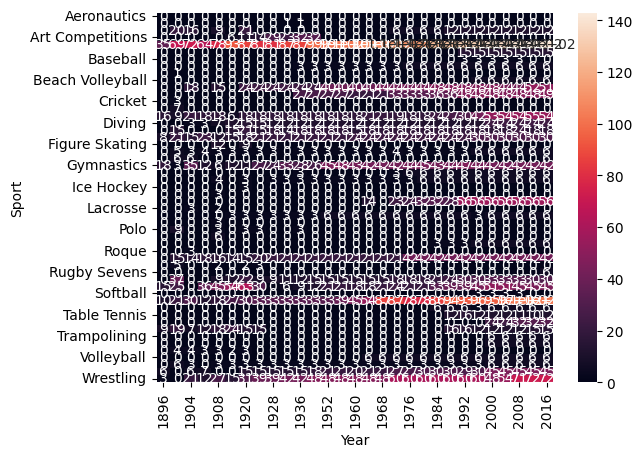

In [383]:
best_sport('USA')

In [384]:
def athlete_stats(country):

    x = df[(df['Gold'] !=0) | (df['Silver'] !=0) | (df['Bronze'] !=0)]
    x = x[x['region'] == country] 
    x =x['Name'].value_counts().reset_index().head(10).merge(df,how='left',left_on='Name',right_on='Name')[['Name','Sport','count']].drop_duplicates()
    return x

In [385]:
athlete_stats("Chile")

,Name,Sport,count
0,Fernando Francisco Gonzlez Ciuffardi,Tennis,3
4,scar Cristi Gallo,Equestrianism,2
6,Nicols Alejandro Mass Fried,Tennis,2
12,Marlene Ahrens Ostertag (-Ebensperger),Athletics,1
14,Claudio Barrientos Negrn,Boxing,1
15,Francisco Esteban Arru Pardo,Football,1
16,Alfonso Marcos de Iruarrzaga Hoces de la Guardia,Shooting,1
19,Pablo Andrs Contreras Fica,Football,1
20,Ricardo Echeverra,Equestrianism,1
22,Sebastin Ignacio Gonzlez Valds,Football,1


`Athlete wise Analysis'

In [386]:
x = df.drop_duplicates(subset=['Name','region'])
x['Age'].dropna(inplace=True)
x1 = x['Age'].dropna()
x2 = x[x['Medal'] == 'Gold']['Age'].dropna()
x3 = x[x['Medal'] == 'Bronze']['Age'].dropna()
x4 = x[x['Medal'] == 'Silver']['Age'].dropna()


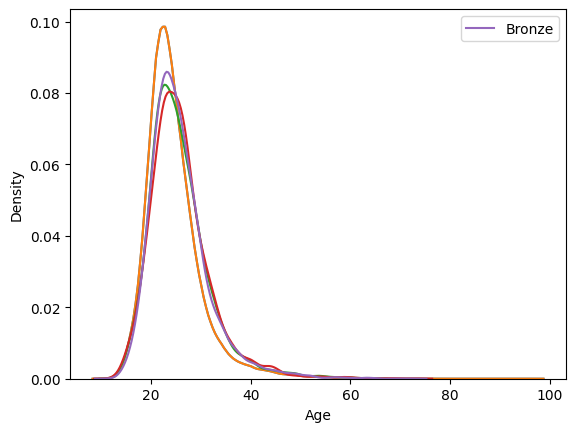

In [387]:
sns.kdeplot(data=x,x = 'Age')
sns.kdeplot(data=x,x = 'Age')
x = medal_tally[medal_tally['Medal'] == 'Gold']
sns.kdeplot(data=x,x = 'Age')
x = medal_tally[medal_tally['Medal'] == 'Silver']
sns.kdeplot(data=x,x = 'Age')
x = medal_tally[medal_tally['Medal'] == 'Bronze']
sns.kdeplot(data=x,x = 'Age',label = 'Bronze')
plt.legend()



In [407]:
def height_weight(df,sport):
    
    df['Medal'].fillna('no medal',inplace= True)
    if sport != 'overall':
        df = df[df['Sport'] == sport]
    sns.scatterplot(data=df,x= 'Height',y = 'Weight',hue= 'Medal',style='Sex') 
    plt.show()

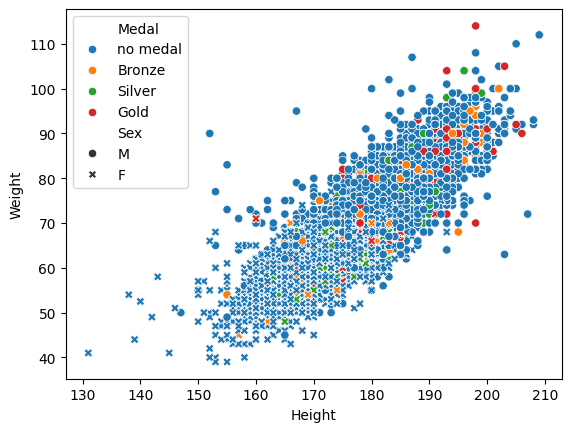

In [408]:
height_weight(df,'Swimming')